In [3]:
# Re-import necessary libraries as execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Generate a synthetic stock dataset
np.random.seed(42)
dates = pd.date_range(start="2024-01-01", periods=30, freq='D')  # 30 days of data

stocks = ["AAPL", "MSFT", "GOOGL", "TSLA", "AMZN"]  # 5 stocks
data = []

In [5]:
# Create random stock prices with a realistic trend
for stock in stocks:
    price = np.random.uniform(100, 300)  # Start with a random base price
    for date in dates:
        price += np.random.uniform(-5, 5)  # Daily fluctuations
        data.append([date, stock, round(price, 2)])

In [6]:
# Create DataFrame
df = pd.DataFrame(data, columns=["Date", "Stock", "Close_Price"])

# Ensure data is sorted by date
df = df.sort_values(by=['Stock', 'Date'])

# Calculate daily percentage change
df['Daily_Change'] = df.groupby('Stock')['Close_Price'].pct_change() * 100  # Convert to percentage

In [7]:
# Calculate total percentage change per stock
stock_performance = df.groupby('Stock')['Daily_Change'].sum().reset_index()
stock_performance.columns = ['Stock', 'Total_Percentage_Change']
best_stock = stock_performance.sort_values(by='Total_Percentage_Change', ascending=False).iloc[0]

# Calculate average daily percentage change
avg_daily_change = df.groupby('Stock')['Daily_Change'].mean().reset_index()
avg_daily_change.columns = ['Stock', 'Avg_Daily_Percentage_Change']

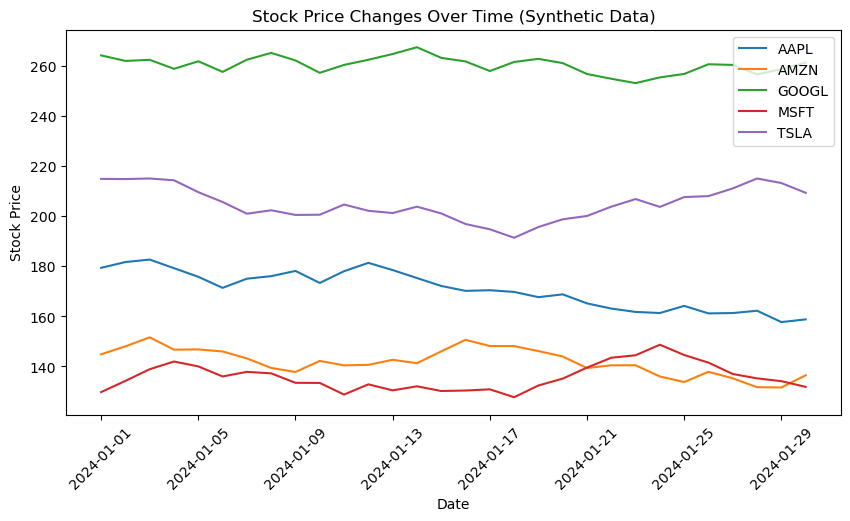

(Stock                          MSFT
 Total_Percentage_Change    2.378721
 Name: 3, dtype: object,
    Stock  Avg_Daily_Percentage_Change
 0   AAPL                    -0.407665
 1   AMZN                    -0.182733
 2  GOOGL                    -0.031101
 3   MSFT                     0.082025
 4   TSLA                    -0.079613)

In [8]:
# Plot stock price trends
plt.figure(figsize=(10, 5))
for stock in df['Stock'].unique():
    stock_data = df[df['Stock'] == stock]
    plt.plot(stock_data['Date'], stock_data['Close_Price'], label=stock)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Changes Over Time (Synthetic Data)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Print best performing stock and average daily percentage change
best_stock, avg_daily_change